# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# IMPORTING DATASET 

In [25]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# UNDERSTANDING DATASET

In [26]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [27]:
fraud_data.drop_duplicates()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Here we creating new coloums for risky and good with the help of PD.cut method

In [28]:
fraud_data["Taxable.Income"]= pd.cut(fraud_data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [29]:
fraud_data.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO
6,NO,Divorced,Good,80890,8,YES
7,YES,Single,Good,131253,3,YES
8,NO,Single,Good,102481,12,YES
9,YES,Divorced,Good,155482,4,YES


# HERE we convert label variables into numbers

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
cols=['Undergrad','Marital.Status','Urban','Taxable.Income']

In [32]:
fraud_data[cols]=fraud_data[cols].apply(LabelEncoder().fit_transform)

In [33]:
fraud_data.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
5,0,0,0,116382,0,0
6,0,0,0,80890,8,1
7,1,2,0,131253,3,1
8,0,2,0,102481,12,1
9,1,0,0,155482,4,1


# ASSUMPTION CHECK

In [34]:
fraud_data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972,0.004830
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.004830,-0.040098,-0.094559,1.000000


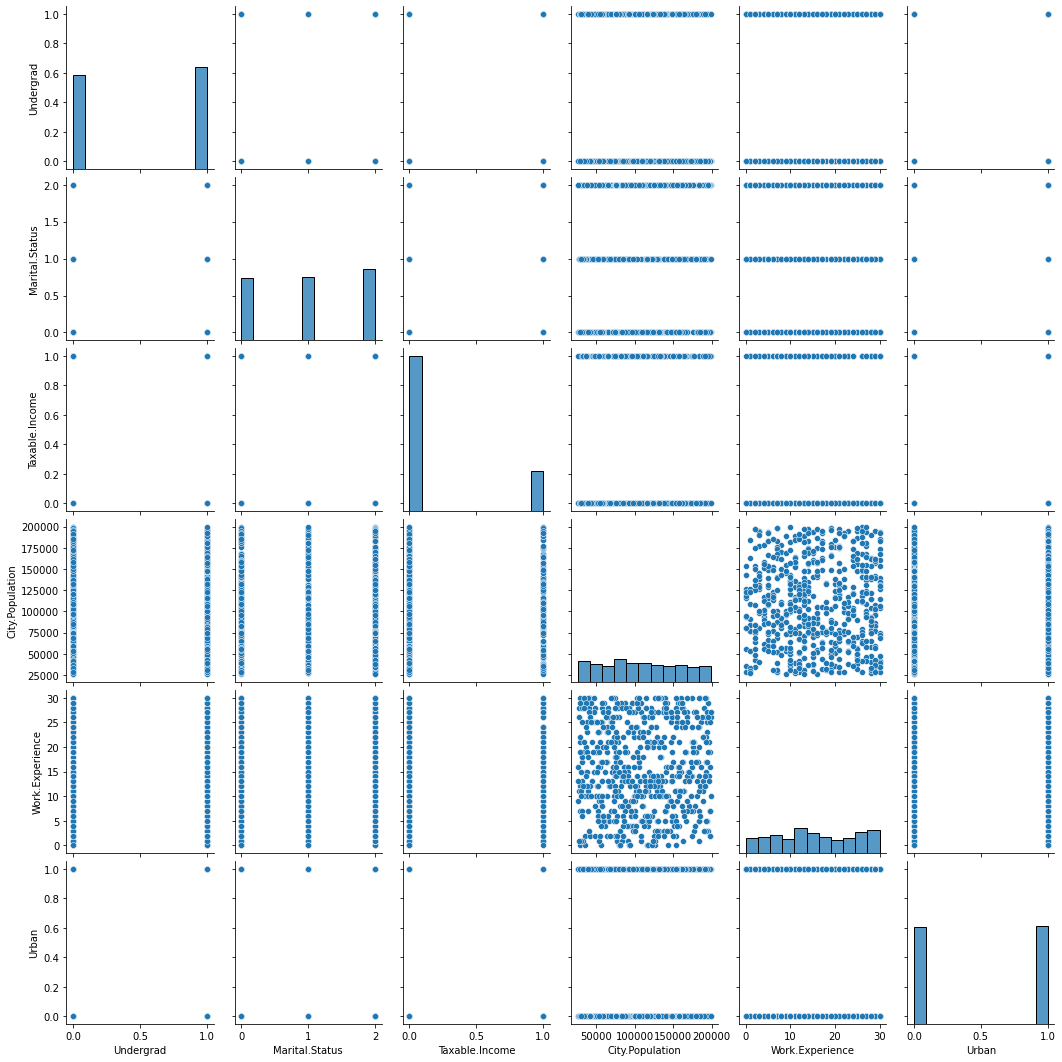

In [35]:
import seaborn as sns
sns.pairplot(data=fraud_data)

In [36]:
fraud_data.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
5,0,0,0,116382,0,0
6,0,0,0,80890,8,1
7,1,2,0,131253,3,1
8,0,2,0,102481,12,1
9,1,0,0,155482,4,1


In [37]:
fraud_data.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","Taxable.Income":"TaxInc","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [38]:
fraud_data

,undergrad,marital,TaxInc,population,experience,urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


# MODEL BUIDLING

In [39]:
x=fraud_data.drop('TaxInc',axis=1)
y=fraud_data[['TaxInc']]

In [40]:
x

,undergrad,marital,population,experience,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [41]:
y

,TaxInc
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [42]:
y.value_counts()

TaxInc
0         476
1         124
dtype: int64

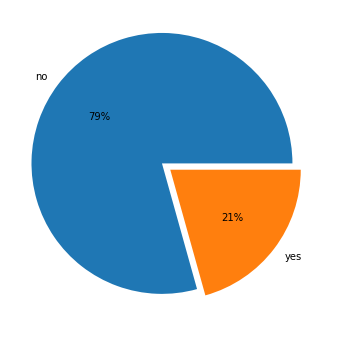

In [43]:
plt.figure(figsize=(8,6))
plt.pie(x=y.value_counts(),explode=[0.08,0],labels=['no','yes'],autopct='%1.0f%%')
plt.show()

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=123)

In [45]:
xtrain.shape,ytrain.shape

((480, 5), (480, 1))

# model training

In [46]:
dec_model=DecisionTreeClassifier(criterion='entropy',max_depth=12,class_weight={0:1,1:4})

In [47]:
dec_model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=12)

In [48]:
grid=GridSearchCV(estimator=dec_model,param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]},cv=5)

In [49]:
grid.fit(x,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 4},
                                              criterion='entropy',
                                              max_depth=12),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [50]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [51]:
grid.best_score_

0.5650000000000001

In [52]:
ypredtrain=dec_model.predict(xtrain)

# MODEL EVAULATION

# TRAIN DATA

In [53]:
print(confusion_matrix(ytrain,ypredtrain))

[[337  45]
 [  8  90]]


In [54]:
print(confusion_matrix(ytrain,ypredtrain))

[[337  45]
 [  8  90]]


In [55]:
print(accuracy_score(ytrain,ypredtrain))

0.8895833333333333


# TEST DATA

In [56]:
ytestpred=dec_model.predict(xtest)

In [57]:
print(confusion_matrix(ytest,ytestpred))

[[61 33]
 [18  8]]


In [58]:
print(classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        94
           1       0.20      0.31      0.24        26

    accuracy                           0.57       120
   macro avg       0.48      0.48      0.47       120
weighted avg       0.65      0.57      0.60       120



In [59]:
print(accuracy_score(ytest,ytestpred))

0.575


# =========================================================

# TRYING WITH STANDARDZATION

In [60]:
x1=fraud_data.drop('TaxInc',axis=1)
y1=fraud_data[['TaxInc']]

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
std_var=StandardScaler()#first data standardized and then initailize like above tandsorm krna hoga tab transfer krna hoiga
stand_x=std_var.fit_transform(x1)

In [63]:
stand_x

array([[-1.040833  ,  1.16079994, -1.17852072, -0.62914254,  0.99335541],
       [ 0.96076892, -1.27444469,  0.50850002,  0.27636996,  0.99335541],
       [-1.040833  , -0.05682237,  1.03310911,  1.63463872,  0.99335541],
       ...,
       [-1.040833  , -1.27444469,  0.90969648, -1.76103318,  0.99335541],
       [ 0.96076892, -0.05682237,  1.43219749,  0.1631809 , -1.00668904],
       [-1.040833  , -1.27444469,  0.9915901 ,  0.04999184, -1.00668904]])

In [64]:
stand_x=pd.DataFrame(stand_x,columns=['undergrad','marital','population','experience','urban'])
stand_x

,undergrad,marital,population,experience,urban
0,-1.040833,1.160800,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,1.033109,1.634639,0.993355
3,0.960769,1.160800,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,0.960769,-1.274445,-1.390432,-0.968710,0.993355
596,0.960769,-1.274445,-1.071672,-1.534655,0.993355
597,-1.040833,-1.274445,0.909696,-1.761033,0.993355
598,0.960769,-0.056822,1.432197,0.163181,-1.006689


In [65]:
x1['population']=stand_x['population']
x1['experience']=stand_x['experience']

In [66]:
x1

,undergrad,marital,population,experience,urban
0,0,2,-1.178521,-0.629143,1
1,1,0,0.508500,0.276370,1
2,0,1,1.033109,1.634639,1
3,1,2,1.696831,-0.063197,1
4,0,1,-1.630532,1.408261,0
...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1
596,1,0,-1.071672,-1.534655,1
597,0,0,0.909696,-1.761033,1
598,1,1,1.432197,0.163181,0


In [67]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=.20,random_state=123,stratify=y)

In [68]:
xtrain1.shape,ytrain1.shape

((480, 5), (480, 1))

In [69]:
xtrain1

,undergrad,marital,population,experience,urban
176,0,1,-0.674149,1.408261,0
109,1,1,1.402122,-0.855521,1
115,1,0,-0.612272,0.615937,1
341,0,1,-0.498858,-0.855521,1
456,0,2,-1.103413,0.842315,1
...,...,...,...,...,...
100,1,2,-1.250858,1.068693,0
78,1,0,0.690758,-1.761033,0
274,1,1,0.077028,1.068693,0
434,1,2,-0.432845,0.389559,1


In [70]:
dec_model1=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight={0:1,1:4})

In [71]:
dec_model1.fit(xtrain1,ytrain1)

DecisionTreeClassifier(class_weight={0: 1, 1: 4}, max_depth=3)

In [72]:
grid1=GridSearchCV(estimator=dec_model1,param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]},cv=5)

In [73]:
grid1.fit(xtrain1,ytrain1)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 4},
                                              max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [74]:
grid1.best_params_

{'criterion': 'gini', 'max_depth': 12}

In [75]:
grid1.best_score_

0.6208333333333333

In [76]:
ypredtrain1=dec_model1.predict(xtrain1)

In [77]:
print(confusion_matrix(ytrain1,ypredtrain1))

[[195 186]
 [ 27  72]]


In [78]:
print(classification_report(ytrain1,ypredtrain1))

              precision    recall  f1-score   support

           0       0.88      0.51      0.65       381
           1       0.28      0.73      0.40        99

    accuracy                           0.56       480
   macro avg       0.58      0.62      0.53       480
weighted avg       0.75      0.56      0.60       480



In [79]:
print(accuracy_score(ytrain1,ypredtrain1))

0.55625


In [80]:
ytestpred1=dec_model1.predict(xtest1)

In [81]:
print(confusion_matrix(ytest1,ytestpred1))

[[39 56]
 [15 10]]


In [82]:
print(classification_report(ytest1,ytestpred1))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52        95
           1       0.15      0.40      0.22        25

    accuracy                           0.41       120
   macro avg       0.44      0.41      0.37       120
weighted avg       0.60      0.41      0.46       120



In [83]:
print(accuracy_score(ytest1,ytestpred1))

0.4083333333333333


# ========================================================